In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "im3"
vol = "all"
z_range = "high_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            return (shapes.loc[cen_id])
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])

    i=0
    for index,cluster in tqdm(clusters.iterrows()):
        ng_list[(i),:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
        i=i+1
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

33it [00:00, 328.08it/s]

62it [00:00, 287.20it/s]

97it [00:00, 301.90it/s]

133it [00:00, 314.80it/s]

169it [00:00, 325.55it/s]

205it [00:00, 333.67it/s]

241it [00:00, 339.63it/s]

275it [00:00, 339.60it/s]

311it [00:00, 343.20it/s]

347it [00:01, 347.98it/s]

383it [00:01, 350.15it/s]

419it [00:01, 351.60it/s]

455it [00:01, 353.70it/s]

491it [00:01, 355.23it/s]

528it [00:01, 356.64it/s]

564it [00:01, 355.94it/s]

600it [00:01, 355.69it/s]

637it [00:01, 357.47it/s]

677it [00:01, 367.27it/s]

716it [00:02, 373.68it/s]

756it [00:02, 378.52it/s]

796it [00:02, 382.30it/s]

835it [00:02, 377.63it/s]

875it [00:02, 381.24it/s]

915it [00:02, 385.21it/s]

955it [00:02, 388.33it/s]

995it [00:02, 389.02it/s]

1035it [00:02, 389.99it/s]

1075it [00:02, 390.04it/s]

1115it [00:03, 389.27it/s]

1154it [00:03, 388.91it/s]

1193it [00:03, 389.04it/s]

1232it [00:03, 375.40it/s]

1271it [00:03, 379.35it/s]

1310it [00:03, 382.42it/s]

1349it [00:03, 383.20it/s]

1388it [00:03, 369.71it/s]

1427it [00:03, 375.14it/s]

1467it [00:04, 379.32it/s]

1507it [00:04, 383.04it/s]

1547it [00:04, 386.96it/s]

1588it [00:04, 391.13it/s]

1628it [00:04, 392.79it/s]

1668it [00:04, 374.20it/s]

1706it [00:04, 368.99it/s]

1744it [00:04, 370.13it/s]

1783it [00:04, 374.53it/s]

1823it [00:04, 380.64it/s]

1863it [00:05, 384.89it/s]

1903it [00:05, 387.27it/s]

1942it [00:05, 387.56it/s]

1981it [00:05, 380.75it/s]

2020it [00:05, 378.24it/s]

2058it [00:05, 376.14it/s]

2096it [00:05, 374.83it/s]

2134it [00:05, 373.82it/s]

2173it [00:05, 375.73it/s]

2212it [00:05, 379.16it/s]

2251it [00:06, 380.44it/s]

2290it [00:06, 381.87it/s]

2329it [00:06, 380.70it/s]

2368it [00:06, 380.77it/s]

2407it [00:06, 379.25it/s]

2445it [00:06, 376.65it/s]

2483it [00:06, 375.78it/s]

2521it [00:06, 373.38it/s]

2559it [00:06, 374.85it/s]

2599it [00:06, 379.96it/s]

2639it [00:07, 384.05it/s]

2678it [00:07, 385.02it/s]

2718it [00:07, 387.19it/s]

2758it [00:07, 389.26it/s]

2797it [00:07, 388.75it/s]

2836it [00:07, 388.91it/s]

2875it [00:07, 382.53it/s]

2914it [00:07, 377.88it/s]

2952it [00:07, 363.16it/s]

2991it [00:08, 370.76it/s]

3031it [00:08, 376.61it/s]

3071it [00:08, 380.88it/s]

3110it [00:08, 382.99it/s]

3149it [00:08, 375.68it/s]

3188it [00:08, 378.19it/s]

3228it [00:08, 381.69it/s]

3267it [00:08, 383.82it/s]

3306it [00:08, 385.51it/s]

3345it [00:08, 386.77it/s]

3385it [00:09, 389.30it/s]

3425it [00:09, 390.03it/s]

3465it [00:09, 389.43it/s]

3505it [00:09, 390.23it/s]

3545it [00:09, 391.22it/s]

3585it [00:09, 390.69it/s]

3625it [00:09, 391.56it/s]

3665it [00:09, 390.77it/s]

3705it [00:09, 389.52it/s]

3744it [00:09, 389.57it/s]

3783it [00:10, 374.45it/s]

3822it [00:10, 378.57it/s]

3861it [00:10, 381.79it/s]

3901it [00:10, 384.28it/s]

3940it [00:10, 384.55it/s]

3979it [00:10, 385.45it/s]

4019it [00:10, 386.77it/s]

4058it [00:10, 385.72it/s]

4097it [00:10, 386.27it/s]

4136it [00:10, 387.20it/s]

4175it [00:11, 387.73it/s]

4214it [00:11, 387.70it/s]

4253it [00:11, 387.26it/s]

4293it [00:11, 388.11it/s]

4332it [00:11, 387.15it/s]

4371it [00:11, 386.05it/s]

4410it [00:11, 385.75it/s]

4449it [00:11, 385.52it/s]

4488it [00:11, 386.25it/s]

4527it [00:12, 387.26it/s]

4566it [00:12, 387.70it/s]

4605it [00:12, 388.16it/s]

4644it [00:12, 388.66it/s]

4683it [00:12, 388.54it/s]

4723it [00:12, 389.02it/s]

4736it [00:12, 377.62it/s]


0it [00:00, ?it/s]

39it [00:00, 385.86it/s]

78it [00:00, 384.62it/s]

111it [00:00, 364.27it/s]

150it [00:00, 369.96it/s]

191it [00:00, 380.19it/s]

232it [00:00, 388.35it/s]

273it [00:00, 393.28it/s]

314it [00:00, 398.14it/s]

352it [00:00, 391.88it/s]

393it [00:01, 397.14it/s]

435it [00:01, 401.28it/s]

476it [00:01, 403.33it/s]

516it [00:01, 401.03it/s]

557it [00:01, 403.64it/s]

598it [00:01, 404.37it/s]

640it [00:01, 406.12it/s]

681it [00:01, 406.54it/s]

722it [00:01, 406.28it/s]

763it [00:01, 406.73it/s]

804it [00:02, 407.45it/s]

846it [00:02, 408.30it/s]

887it [00:02, 406.66it/s]

928it [00:02, 404.61it/s]

969it [00:02, 402.22it/s]

1010it [00:02, 402.57it/s]

1051it [00:02, 402.93it/s]

1092it [00:02, 404.57it/s]

1133it [00:02, 349.22it/s]

1174it [00:02, 364.83it/s]

1212it [00:03, 364.26it/s]

1254it [00:03, 377.09it/s]

1293it [00:03, 361.90it/s]

1334it [00:03, 374.72it/s]

1375it [00:03, 383.38it/s]

1416it [00:03, 390.28it/s]

1458it [00:03, 395.76it/s]

1499it [00:03, 398.30it/s]

1540it [00:03, 400.95it/s]

1582it [00:04, 404.17it/s]

1624it [00:04, 406.23it/s]

1665it [00:04, 404.65it/s]

1706it [00:04, 404.78it/s]

1747it [00:04, 404.51it/s]

1788it [00:04, 383.57it/s]

1830it [00:04, 391.63it/s]

1871it [00:04, 394.58it/s]

1911it [00:04, 395.54it/s]

1951it [00:04, 391.98it/s]

1991it [00:05, 393.53it/s]

2031it [00:05, 394.88it/s]

2071it [00:05, 395.68it/s]

2112it [00:05, 397.62it/s]

2154it [00:05, 402.18it/s]

2195it [00:05, 403.00it/s]

2236it [00:05, 404.12it/s]

2277it [00:05, 403.46it/s]

2318it [00:05, 404.13it/s]

2359it [00:05, 387.50it/s]

2399it [00:06, 389.17it/s]

2440it [00:06, 394.49it/s]

2482it [00:06, 400.67it/s]

2524it [00:06, 404.48it/s]

2565it [00:06, 399.77it/s]

2607it [00:06, 403.17it/s]

2648it [00:06, 405.04it/s]

2689it [00:06, 406.06it/s]

2731it [00:06, 407.57it/s]

2772it [00:07, 401.29it/s]

2814it [00:07, 404.26it/s]

2855it [00:07, 397.86it/s]

2896it [00:07, 400.39it/s]

2937it [00:07, 401.36it/s]

2978it [00:07, 402.58it/s]

3019it [00:07, 403.82it/s]

3061it [00:07, 406.28it/s]

3102it [00:07, 405.76it/s]

3143it [00:07, 406.09it/s]

3185it [00:08, 407.69it/s]

3226it [00:08, 407.09it/s]

3267it [00:08, 406.18it/s]

3308it [00:08, 405.33it/s]

3349it [00:08, 406.42it/s]

3391it [00:08, 407.51it/s]

3432it [00:08, 408.15it/s]

3473it [00:08, 406.24it/s]

3514it [00:08, 405.94it/s]

3555it [00:08, 406.31it/s]

3597it [00:09, 407.26it/s]

3638it [00:09, 405.86it/s]

3679it [00:09, 406.48it/s]

3720it [00:09, 407.26it/s]

3761it [00:09, 407.65it/s]

3803it [00:09, 408.13it/s]

3844it [00:09, 407.86it/s]

3885it [00:09, 407.03it/s]

3926it [00:09, 407.36it/s]

3967it [00:09, 408.08it/s]

4009it [00:10, 408.85it/s]

4050it [00:10, 405.93it/s]

4091it [00:10, 361.35it/s]

4131it [00:10, 369.53it/s]

4172it [00:10, 379.19it/s]

4212it [00:10, 384.93it/s]

4253it [00:10, 389.90it/s]

4294it [00:10, 393.26it/s]

4335it [00:10, 397.67it/s]

4375it [00:11, 389.89it/s]

4416it [00:11, 393.61it/s]

4457it [00:11, 395.73it/s]

4497it [00:11, 378.05it/s]

4538it [00:11, 385.82it/s]

4579it [00:11, 390.95it/s]

4619it [00:11, 379.53it/s]

4658it [00:11, 379.29it/s]

4697it [00:11, 378.94it/s]

4735it [00:11, 378.87it/s]

4736it [00:11, 396.06it/s]

In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_ylim(-0.020,0.020)
    plt.show()
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

# Abs Plots

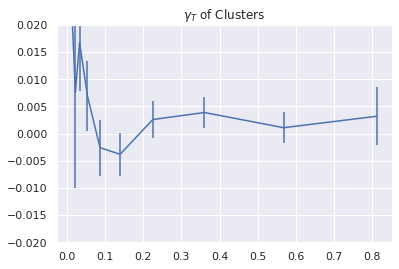

[-1.9716e-02 -1.8110e+00 -1.2977e+01 -9.2621e+00  5.9920e+00  1.5374e+01
 -1.5138e+01 -2.9711e+01 -8.3751e+00 -6.2454e+00]
------------------------------------------------------------------------------
[-4.1936e+00 -9.0309e+02 -2.6320e+03 -3.9039e+03 -5.6254e+03 -7.9541e+03
 -8.7285e+03 -7.8282e+03 -4.3770e+03 -4.0717e+02]
------------------------------------------------------------------------------
[1.000e+00 2.380e+02 7.750e+02 1.339e+03 2.304e+03 4.042e+03 5.856e+03
 7.670e+03 7.738e+03 1.955e+03]
------------------------------------------------------------------------------
[-0.0197 -0.0076 -0.0167 -0.0069  0.0026  0.0038 -0.0026 -0.0039 -0.0011
 -0.0032]
------------------------------------------------------------------------------
[-4.1936 -3.7945 -3.3961 -2.9155 -2.4416 -1.9679 -1.4905 -1.0206 -0.5657
 -0.2083]
------------------------------------------------------------------------------


In [19]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_T$ of Clusters ")
for data  in sum_abs:
    print(data)
    print(sep)
for data in mean_abs:
    print(data)
    print(sep)

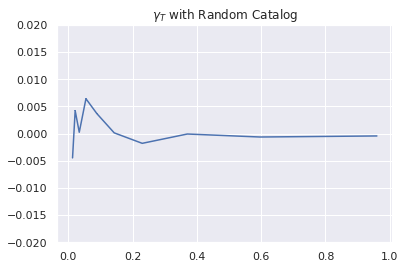

[-4.4708e-03  4.2146e-03  2.4532e-04  6.4103e-03  3.6750e-03  1.3263e-04
 -1.7934e-03 -8.1019e-05 -6.3031e-04 -4.3576e-04]
[ 6.4965e-05 -6.1242e-05 -3.5648e-06 -9.3148e-05 -5.3402e-05 -1.9273e-06
  2.6060e-05  1.1773e-06  9.1590e-06  6.3320e-06]


In [20]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_T$ with Random Catalog")
print(-r_xi)
print(r_sigma)

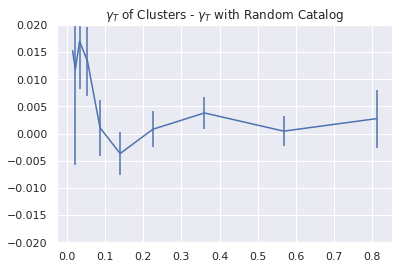

In [21]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_T$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

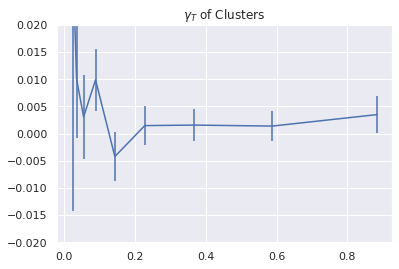

[  0.      -1.4289  -5.3477  -3.142  -17.5867  13.0959  -7.244  -10.8942
 -11.5194 -18.1063]
------------------------------------------------------------------------------
[    0.      -157.7881 -1791.3528 -2965.7043 -4317.5704 -6032.252
 -7308.3494 -6999.8986 -4441.3485  -643.3478]
------------------------------------------------------------------------------
[   0.   42.  533. 1020. 1779. 3101. 4935. 6970. 8350. 5188.]
------------------------------------------------------------------------------
[    nan -0.034  -0.01   -0.0031 -0.0099  0.0042 -0.0015 -0.0016 -0.0014
 -0.0035]
------------------------------------------------------------------------------
[    nan -3.7569 -3.3609 -2.9076 -2.427  -1.9453 -1.4809 -1.0043 -0.5319
 -0.124 ]
------------------------------------------------------------------------------


In [22]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_T$ of Clusters ")
for data  in sum_rel:
    print(data)
    print(sep)
for data in mean_rel:
    print(data)
    print(sep)